In [ ]:
# !pip install hmmlearn
# !pip install pyfinance
# !pip install pandas
# !pip install numpy
# !pip install matplotlib

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from hmmlearn import hmm
import matplotlib.pyplot as plt

def analyze_asset_with_hmm(ticker, start_date='2024-01-01', end_date='2025-09-01', n_states=3, save_plot=False):
    """
    Realiza uma análise de Cadeia Oculta de Markov (HMM) para um ativo financeiro.

    Args:
        ticker (str): O ticker do ativo (ex: 'NVDA', '^BVSP', 'BTC-USD').
        start_date (str): Data de início para o download dos dados.
        end_date (str): Data de término para o download dos dados.
        n_states (int): O número de estados ocultos a serem modelados.
        save_plot (bool): Se True, salva o gráfico como uma imagem PNG.
    """
    print(f"--- Iniciando a análise para {ticker} ---")

    # Passo 1: Download e Preparação dos Dados
    try:
        data = yf.download(ticker, start=start_date, end=end_date, auto_adjust=False)
        if data.empty:
            print(f"Erro: Não foi possível baixar dados para o ticker {ticker}. Verifique o ticker e o intervalo de datas.")
            return
    except Exception as e:
        print(f"Ocorreu um erro ao baixar os dados: {e}")
        return

    # Calcular os retornos logarítmicos e formatar para o HMM
    log_returns = np.log(1 + data['Adj Close'].pct_change()).dropna()
    X = log_returns.values.reshape(-1, 1)

    if len(X) < 100:  # O hmmlearn precisa de uma quantidade razoável de dados
        print(f"Dados insuficientes para o ticker {ticker}. É necessário pelo menos 100 pontos de dados.")
        return

    print(f"Dados preparados para o modelo. Forma: {X.shape}")

    # Passo 2: Treinamento do Modelo HMM
    model = hmm.GaussianHMM(n_components=n_states, covariance_type="full", n_iter=100)
    try:
        model.fit(X)
    except Exception as e:
        print(f"Erro no treinamento do modelo HMM para {ticker}: {e}")
        return

    # Passo 3: Inferência e Visualização
    hidden_states = model.predict(X)
    data = data.iloc[1:]
    data['Hidden_State'] = hidden_states

    # Visualização
    plt.figure(figsize=(15, 8))
    plt.plot(data['Adj Close'], label=f'Preço de Fechamento de {ticker}', color='gray', alpha=0.6)
    colors = ['red', 'green', 'blue', 'purple', 'orange']

    for i in range(n_states):
        state_data = data[data['Hidden_State'] == i]
        plt.scatter(state_data.index, state_data['Adj Close'], label=f'Estado Oculto {i}', s=10, color=colors[i % len(colors)])

    plt.title(f'Regimes de Mercado Ocultos - {ticker}')
    plt.xlabel('Data')
    plt.ylabel('Preço de Fechamento Ajustado')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)

    if save_plot:
        plt.savefig(f'hmm_analysis_{ticker}.png')
        print(f"Gráfico salvo como hmm_analysis_{ticker}.png")

    plt.show()

    # Passo 4: Impressão dos Parâmetros do Modelo
    print(f"\n--- Parâmetros do Modelo HMM para {ticker} ---")
    print("Matriz de Probabilidades de Transição:\n", model.transmat_)
    print("Médias de Retornos por Estado:\n", model.means_)
    print("Variâncias de Retornos por Estado:\n", model.covars_)
    print("-------------------------------------------\n")

--- Iniciando a análise para ^BVSP ---


[*********************100%***********************]  1 of 1 completed


Dados preparados para o modelo. Forma: (6356, 1)


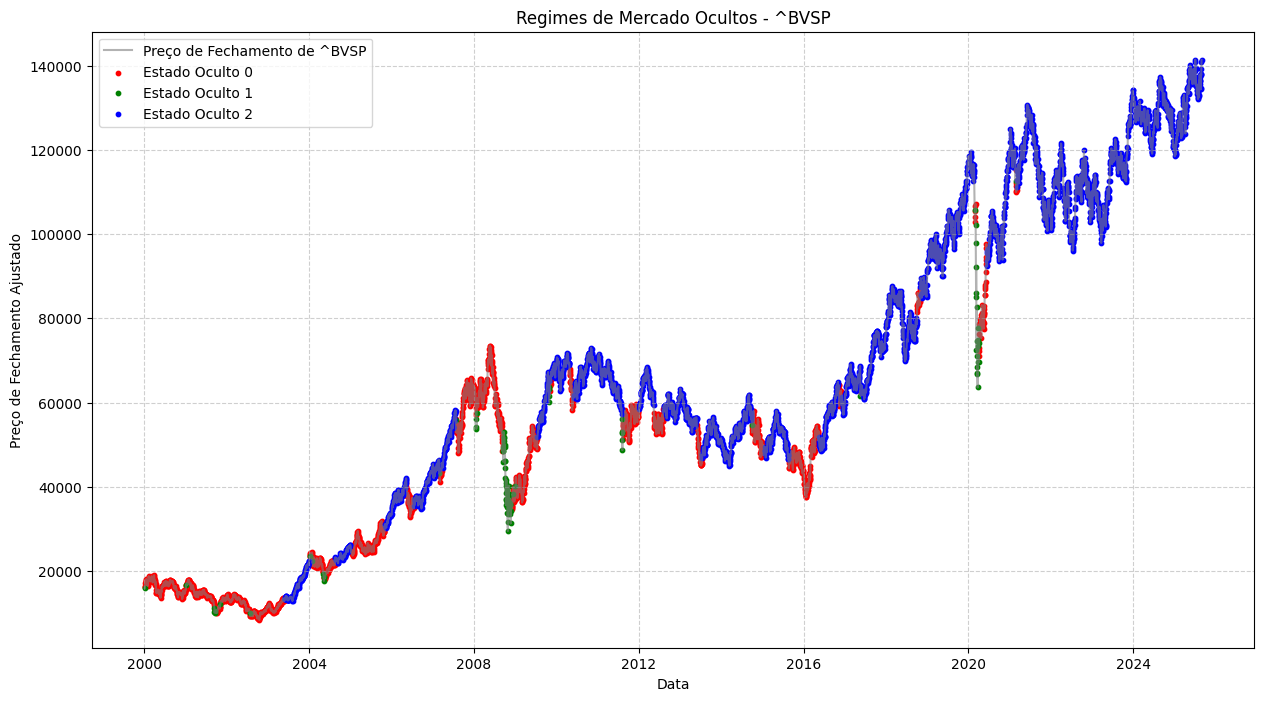


--- Parâmetros do Modelo HMM para ^BVSP ---
Matriz de Probabilidades de Transição:
 [[9.42069181e-01 4.40527886e-02 1.38780303e-02]
 [4.30932368e-01 5.68639974e-01 4.27658713e-04]
 [3.91962687e-03 3.77606985e-03 9.92304303e-01]]
Médias de Retornos por Estado:
 [[ 7.31599236e-05]
 [-5.64991548e-03]
 [ 8.87407445e-04]]
Variâncias de Retornos por Estado:
 [[[0.00035828]]

 [[0.00212332]]

 [[0.00013666]]]
-------------------------------------------



In [ ]:
# Analisar IBOVESPA
analyze_asset_with_hmm('^BVSP', start_date='2000-01-01', end_date='2025-09-01', n_states=3)

--- Iniciando a análise para GC=F ---


[*********************100%***********************]  1 of 1 completed


Dados preparados para o modelo. Forma: (6272, 1)


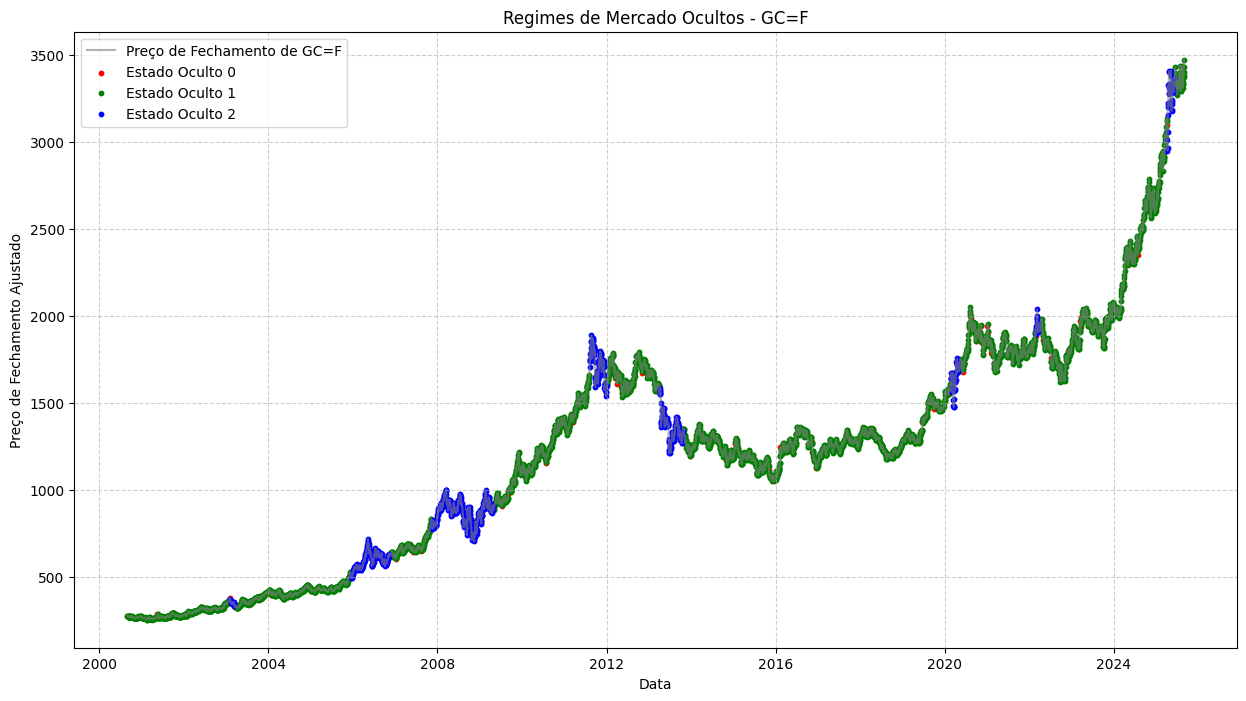


--- Parâmetros do Modelo HMM para GC=F ---
Matriz de Probabilidades de Transição:
 [[6.25249771e-03 9.78402127e-01 1.53453751e-02]
 [1.07966046e-01 8.91008018e-01 1.02593682e-03]
 [4.61129009e-04 1.78133775e-02 9.81725493e-01]]
Médias de Retornos por Estado:
 [[-0.00283646]
 [ 0.00085927]
 [-0.00028153]]
Variâncias de Retornos por Estado:
 [[[3.25042695e-04]]

 [[6.17090583e-05]]

 [[3.86181400e-04]]]
-------------------------------------------



In [ ]:
# Analisar Ouro
analyze_asset_with_hmm('GC=F', start_date='2000-01-01', end_date='2025-09-01', n_states=3)

[*********************100%***********************]  1 of 1 completed

--- Iniciando a análise para BTC-USD ---
Dados preparados para o modelo. Forma: (2069, 1)


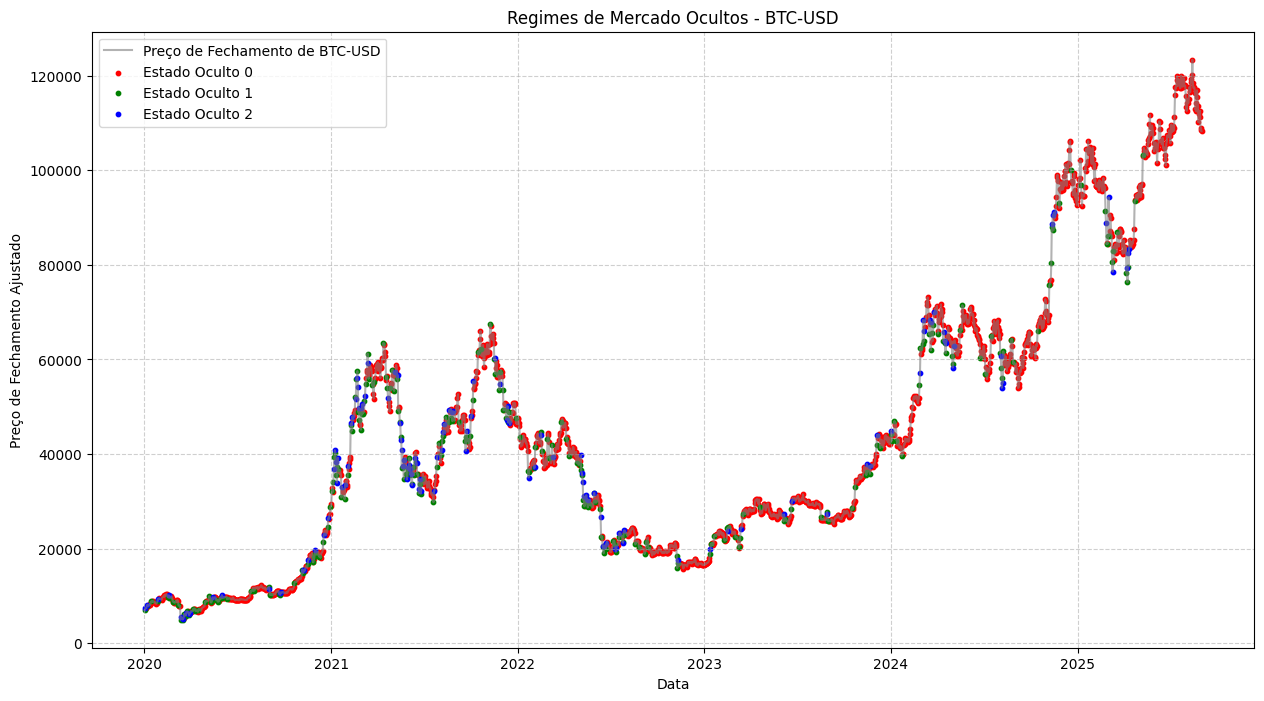


--- Parâmetros do Modelo HMM para BTC-USD ---
Matriz de Probabilidades de Transição:
 [[8.11911601e-01 1.87402869e-01 6.85530040e-04]
 [4.18394332e-01 1.10179182e-01 4.71426486e-01]
 [3.95799482e-01 5.66094112e-01 3.81064057e-02]]
Médias de Retornos por Estado:
 [[ 0.0009628 ]
 [-0.00437253]
 [ 0.01514436]]
Variâncias de Retornos por Estado:
 [[[0.00030304]]

 [[0.00321698]]

 [[0.00180134]]]
-------------------------------------------



In [ ]:
# Analisar Bitcoin
analyze_asset_with_hmm('BTC-USD', start_date='2020-01-01', end_date='2025-09-01', n_states=3)

[*********************100%***********************]  1 of 1 completed

--- Iniciando a análise para NVDA ---
Dados preparados para o modelo. Forma: (1422, 1)


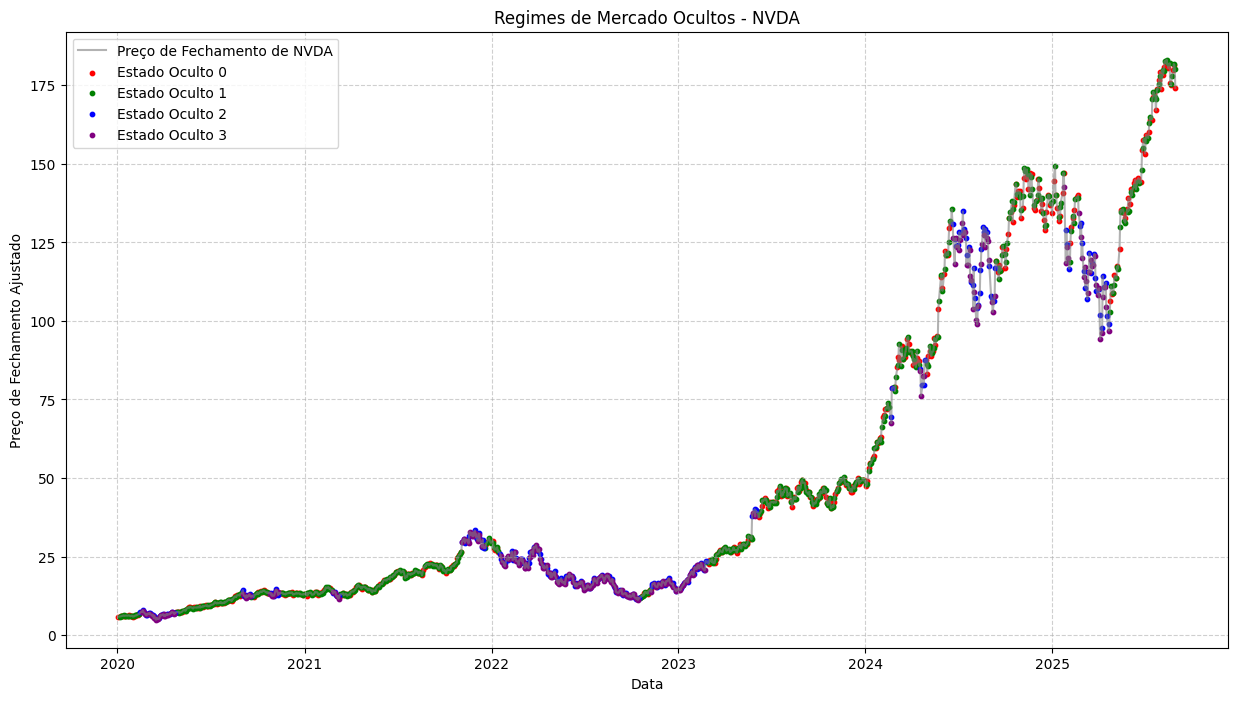


--- Parâmetros do Modelo HMM para NVDA ---
Matriz de Probabilidades de Transição:
 [[5.65043252e-03 9.73275621e-01 7.29740756e-09 2.10739388e-02]
 [8.17003553e-01 1.55052337e-01 2.77186119e-02 2.25498562e-04]
 [1.68807014e-02 6.42235971e-02 1.46717907e-01 7.72177795e-01]
 [6.62049659e-06 5.43540763e-07 8.27110219e-01 1.72882617e-01]]
Médias de Retornos por Estado:
 [[ 0.00284689]
 [ 0.00538398]
 [ 0.01488446]
 [-0.01678032]]
Variâncias de Retornos por Estado:
 [[[0.00062171]]

 [[0.00044975]]

 [[0.00225673]]

 [[0.00170259]]]
-------------------------------------------



In [ ]:
# (NVIDIA) e um número diferente de estados
analyze_asset_with_hmm('NVDA', start_date='2020-01-01', end_date='2025-09-01', n_states=4)